# Book Recommendation System
A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Loading in data

In [ ]:
#PC Execution
dataset = pd.read_csv('D:\Business\RecommenderSystem\Recommendation%20System/ratings.csv')

In [ ]:
#Copy from google drive
!cp /content/gdrive/My\ Drive/ratings.csv .

In [44]:
#Fast and big data copy
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sATKzixgdJaDvR1-zdFb3vo1XFGH9Ggu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sATKzixgdJaDvR1-zdFb3vo1XFGH9Ggu" -O ratings.csv && rm -rf /tmp/cookies.txt

--2021-01-05 08:35:37--  https://docs.google.com/uc?export=download&confirm=&id=1sATKzixgdJaDvR1-zdFb3vo1XFGH9Ggu
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.100, 74.125.20.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/ufl8sdal7vi1m2ls2sd0vdtge8cmj1np/fa4t1upn97eg0nekr2i1iq7nt444l8v1/1609835700000/17707936527307082955/04280405981389771738Z/1sATKzixgdJaDvR1-zdFb3vo1XFGH9Ggu?e=download [following]
--2021-01-05 08:35:38--  https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/ufl8sdal7vi1m2ls2sd0vdtge8cmj1np/fa4t1upn97eg0nekr2i1iq7nt444l8v1/1609835700000/17707936527307082955/04280405981389771738Z/1sATKzixgdJaDvR1-zdFb3vo1XFGH9Ggu?e=download
Resolving doc-0o-4c-docs.googleusercontent.com (doc-0o-4c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-

In [45]:
#Colab execution
dataset = pd.read_csv('ratings.csv')

In [46]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
dataset.shape

(981756, 3)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [6]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [7]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [8]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [9]:
n_books = len(dataset.book_id.unique())
n_books

10000

## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [10]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [ ]:
!cp /content/gdrive/My\ Drive/regression_model.h5 .

Epoch 1/5
24544/24544 [==============================] - 114s 5ms/step - loss: 15.3495
Epoch 2/5
24544/24544 [==============================] - 111s 5ms/step - loss: 6.6226
Epoch 3/5
24544/24544 [==============================] - 110s 4ms/step - loss: 2.2430
Epoch 4/5
24544/24544 [==============================] - 109s 4ms/step - loss: 1.3434
Epoch 5/5
24544/24544 [==============================] - 106s 4ms/step - loss: 1.0125


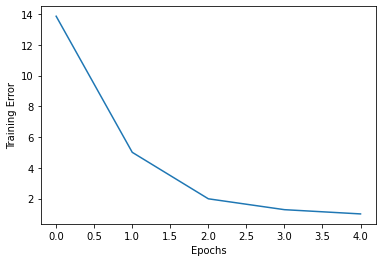

In [11]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [14]:
!cp regression_model.h5 /content/gdrive/My\ Drive/

In [15]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 8s 1ms/step - loss: 1.2393


1.2392547130584717

In [16]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.175034] 5
[4.1002064] 4
[3.5252862] 3
[4.2581763] 5
[3.2526455] 3
[3.9032307] 3
[4.015732] 3
[4.430905] 4
[4.501182] 3
[4.1049314] 5


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [17]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

In [ ]:
!cp /content/gdrive/My\ Drive/regression_model2.h5 .

Epoch 1/5
24544/24544 [==============================] - 112s 5ms/step - loss: 1.0098
Epoch 2/5
24544/24544 [==============================] - 110s 4ms/step - loss: 0.6808
Epoch 3/5
24544/24544 [==============================] - 109s 4ms/step - loss: 0.6446
Epoch 4/5
24544/24544 [==============================] - 110s 4ms/step - loss: 0.6205
Epoch 5/5
24544/24544 [==============================] - 110s 4ms/step - loss: 0.5988


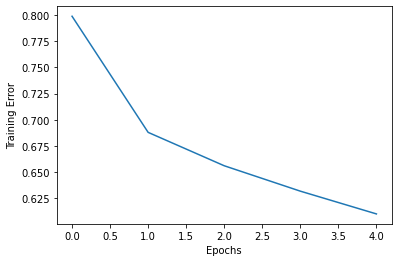

In [18]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
!cp regression_model2.h5 /content/gdrive/My\ Drive/

In [20]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 9s 1ms/step - loss: 0.7113


0.7113286256790161

In [21]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.955114] 5
[3.7410073] 4
[3.5804563] 3
[3.9991403] 5
[3.3866596] 3
[3.9169655] 3
[3.5287724] 3
[4.8281837] 4
[4.211674] 3
[4.0928082] 5


[None, None, None, None, None, None, None, None, None, None]

## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [22]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [23]:
book_em_weights[:5]

array([[ 0.01048537, -0.00543468,  0.03530084,  0.04108896, -0.04885718],
       [ 1.4161016 , -1.4599047 , -1.3991301 , -1.3742715 ,  1.3182114 ],
       [ 1.3497986 , -1.2988579 , -1.419764  , -1.3070867 ,  1.3073328 ],
       [ 0.80681306, -1.3031919 , -1.1812199 , -0.8713796 ,  0.6812337 ],
       [ 1.4034513 , -1.3663654 , -1.4359453 , -1.4048501 ,  1.2579495 ]],
      dtype=float32)

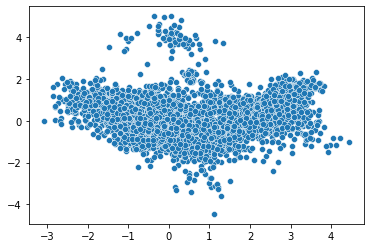

In [24]:
#PCA = Principal Component Analysis
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [25]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.99999994

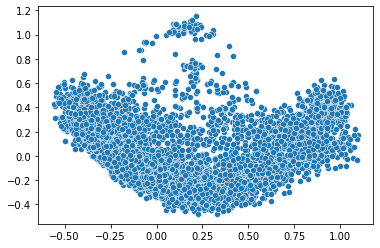

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [28]:
#TSNE = t-distributed stochastic neighbor embedding
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.007s...
[t-SNE] Computed neighbors for 10001 samples in 0.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.031324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.515182
[t-SNE] KL

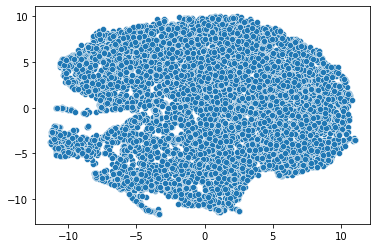

In [29]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

## Making Recommendations

In [30]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [31]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [32]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([7638, 7152, 8258, 9841, 9872])

In [33]:
# print predicted scores
predictions[recommended_book_ids]

array([4.608378, 4.597233, 4.404887, 4.396012, 4.364162], dtype=float32)

In [41]:
!cp /content/gdrive/My\ Drive/books.csv .

In [42]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [43]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7151,7152,625554,20178265,611921,8,159038363X,9.781590e+12,Gerald N. Lund,1994.0,"The Work and the Glory, Vol. 1: Pillar of Light","Pillar of Light (The Work and the Glory, #1)",NaN,4.28,12722,14255,894,117,337,1951,4949,6901,https://images.gr-assets.com/books/1416338631m...,https://images.gr-assets.com/books/1416338631s...
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,The Algebraist,eng,3.99,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8257,8258,18594594,18594594,26341000,41,345547497,9.780346e+12,Karin Slaughter,2014.0,Cop Town,Cop Town,eng,3.88,10660,13997,1704,274,780,3299,5612,4032,https://images.gr-assets.com/books/1384822680m...,https://images.gr-assets.com/books/1384822680s...
9840,9841,15101,15101,876908,55,380815923,9.780381e+12,Joanne Harris,1999.0,Blackberry Wine,Blackberry Wine,en-US,3.78,9558,11107,699,163,755,3215,4220,2754,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9871,9872,24480276,24480276,44074400,45,NaN,9.781475e+12,Laura Barnett,2015.0,The Versions of Us,The Versions of Us,eng,3.57,8477,11346,1685,382,1170,3457,4250,2087,https://images.gr-assets.com/books/1423155390m...,https://images.gr-assets.com/books/1423155390s...
